<a href="https://colab.research.google.com/github/HaHyunkyung/Prediction-of-disabled-call-taxi-waiting-time/blob/main/3_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 1.환경설정

### (1) 경로 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

In [ ]:
!pip install -r requirements.txt

  Obtaining dependency information for pandas==1.5.3 from https://files.pythonhosted.org/packages/da/6d/1235da14daddaa6e47f74ba0c255358f0ce7a6ee05da8bf8eb49161aa6b5/pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached numpy-1.22.4.zip (11.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for matplotlib==3.7.1 from https://files.pythonhosted.org/packages/fb/8c/391e3c105edb7e193bb163ed48988135228d0b5ce3143e1cbec2350e23c8/matplotlib-3.7.1-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for xgboost=

ERROR: Cannot install -r requirements.txt (line 1) and numpy==1.22.4 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


#### 2) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [ ]:
data2 = pd.read_csv('data2.csv')

## 2.데이터 준비

### (1) NA 조치

In [ ]:
data2.isna().sum()

Date                    0
Car_count               0
Register                0
Boarding                0
Wait_time               0
Average_mean            0
Riding_mean             0
Day_of_week             0
Month                   0
Year                    0
waiting_time            1
temp_max                2
temp_min                2
rain(mm)                2
humidity_max(%)         2
humidity_min(%)         2
sunshine(MJ/m2)         2
season                  0
holiday                 0
7_day_wait_time_mean    6
Cancel                  0
Total_wait              0
Boarding_rate           0
dtype: int64

In [ ]:
data2.dropna(inplace = True)

In [ ]:
data2.isna().sum()

Date                    0
Car_count               0
Register                0
Boarding                0
Wait_time               0
Average_mean            0
Riding_mean             0
Day_of_week             0
Month                   0
Year                    0
waiting_time            0
temp_max                0
temp_min                0
rain(mm)                0
humidity_max(%)         0
humidity_min(%)         0
sunshine(MJ/m2)         0
season                  0
holiday                 0
7_day_wait_time_mean    0
Cancel                  0
Total_wait              0
Boarding_rate           0
dtype: int64

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2914 entries, 6 to 2919
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2914 non-null   object 
 1   Car_count             2914 non-null   int64  
 2   Register              2914 non-null   int64  
 3   Boarding              2914 non-null   int64  
 4   Wait_time             2914 non-null   float64
 5   Average_mean          2914 non-null   int64  
 6   Riding_mean           2914 non-null   int64  
 7   Day_of_week           2914 non-null   object 
 8   Month                 2914 non-null   int64  
 9   Year                  2914 non-null   int64  
 10  waiting_time          2914 non-null   float64
 11  temp_max              2914 non-null   float64
 12  temp_min              2914 non-null   float64
 13  rain(mm)              2914 non-null   float64
 14  humidity_max(%)       2914 non-null   float64
 15  humidity_min(%)       2914

In [ ]:

data2.drop(columns=['Date'], inplace=True)
#data2.drop(columns=['season'],inplace = True)

### (2) 가변수화

In [ ]:
data2.columns

Index(['Car_count', 'Register', 'Boarding', 'Wait_time', 'Average_mean',
       'Riding_mean', 'Day_of_week', 'Month', 'Year', 'waiting_time',
       'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'season', 'holiday',
       '7_day_wait_time_mean', 'Cancel', 'Total_wait', 'Boarding_rate'],
      dtype='object')

In [ ]:
# 가변수 대상 변수 식별
dump_cols = ['Day_of_week', 'season']
data2 = pd.get_dummies(data2, columns=dump_cols, drop_first=True, dtype=int)
#  확인
data2.head()

,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Month,Year,waiting_time,temp_max,...,Boarding_rate,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,season_Spring,season_Summer,season_Winter
6,410,4085,3676,24.7,2230,8646,1,2015,21.2,3.2,...,0.899878,0,0,0,0,0,1,0,0,1
7,419,4030,3728,21.2,2231,8683,1,2015,21.8,4.3,...,0.925062,0,0,0,1,0,0,0,0,1
8,424,4167,3813,21.8,2215,8506,1,2015,41.2,2.3,...,0.915047,0,0,0,0,0,0,0,0,1
9,215,1916,1645,41.2,2447,11123,1,2015,28.8,3.4,...,0.858559,0,1,0,0,0,0,0,0,1
10,187,1700,1572,28.8,2419,10806,1,2015,23.2,5.4,...,0.924706,0,0,1,0,0,0,0,0,1


### (3) 데이터분할

In [ ]:
validation_set = data2.tail(91)

validation_set


,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Month,Year,waiting_time,temp_max,...,Boarding_rate,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,season_Spring,season_Summer,season_Winter
2829,658,5808,4836,45.7,2248,8636,9,2022,50.6,21.4,...,0.832645,0,0,0,0,0,0,0,0,0
2830,345,2528,2037,50.6,2487,10845,10,2022,36.4,23.3,...,0.805775,0,1,0,0,0,0,0,0,0
2831,249,1935,1631,36.4,2495,10803,10,2022,24.9,23.0,...,0.842894,0,0,1,0,0,0,0,0,0
2832,267,1707,1374,24.9,2367,9868,10,2022,41.0,21.3,...,0.804921,1,0,0,0,0,0,0,0,0
2833,650,5923,4968,41.0,2218,8345,10,2022,48.4,18.7,...,0.838764,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,217,1945,1588,38.7,2416,10212,12,2022,39.2,3.0,...,0.816452,0,0,1,0,0,0,0,0,1
2916,603,5555,4605,39.2,2163,7889,12,2022,44.4,-0.3,...,0.828983,1,0,0,0,0,0,0,0,1
2917,669,5635,4654,44.4,2198,8178,12,2022,44.8,1.7,...,0.825909,0,0,0,0,1,0,0,0,1
2918,607,5654,4648,44.8,2161,7882,12,2022,52.5,2.1,...,0.822073,0,0,0,0,0,1,0,0,1


In [ ]:
final_df = data2.head(2823)

#### 1) x, y 나누기

In [ ]:
target = 'waiting_time'

x = data2.drop(target, axis=1)
y = data2[target]

#### 2) train : validation 나누기

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=91, shuffle=False)


### (4) Scaling


In [ ]:
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)


## 3.모델링

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score
from autogluon.tabular import TabularPredictor

In [ ]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

### (1) 머신러닝

#### 1) 모델1 LinearRegression

In [ ]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Linear MAE:',mean_absolute_error(y_test, y_pred))
print('Linear MAPE:', mean_absolute_percentage_error(y_test, y_pred))

Linear MAE: 4.219744860505597
Linear MAPE: 0.10640480898928241


평균 : 40.239461565710236


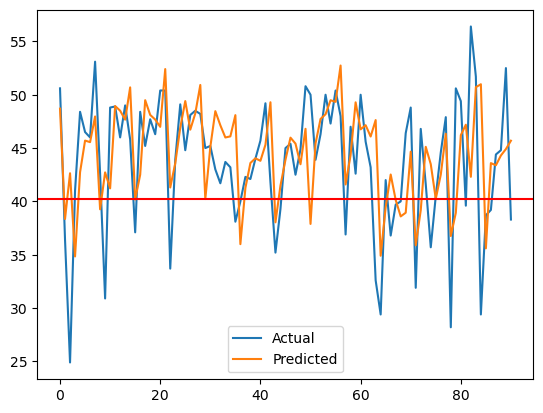

In [ ]:
y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()


#### 2) 모델2 KNN

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)

model.fit(x_train_s, y_train)

y_pred = model.predict(x_test_s)

print('MAE:',mean_absolute_error(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))

MAE: 5.712967032967032
MAPE: 0.1344719851896011


평균 : 40.239461565710236


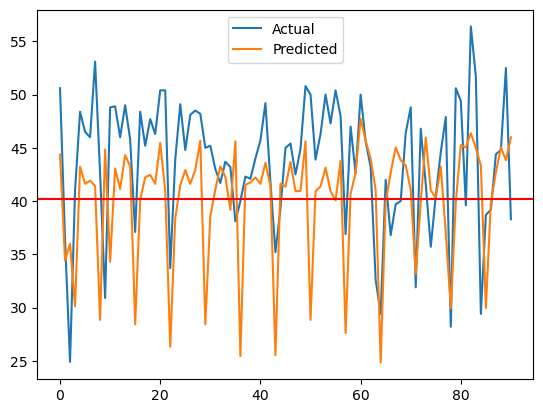

In [ ]:

model.fit(x_train_s, y_train)
y_pred = model.predict(x_test_s)
y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

#### 3) 모델3 Decision Tree

In [ ]:
model = DecisionTreeRegressor(max_depth=5)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAE: 5.351363156143939
MAPE: 0.12877188364281328


평균 : 40.239461565710236


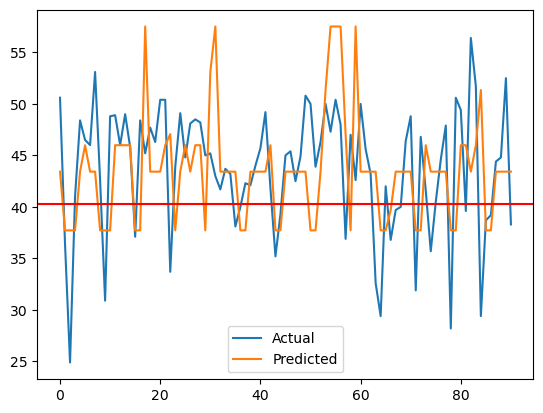

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

#### 4) 모델4 Random Forest

In [ ]:
model = RandomForestRegressor(max_depth=5)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Random MAE:', mean_absolute_error(y_test, y_pred))
print('Random MAPE:', mean_absolute_percentage_error(y_test, y_pred))


Random MAE: 4.582577261848794
Random MAPE: 0.11169964724741722


평균 : 40.239461565710236


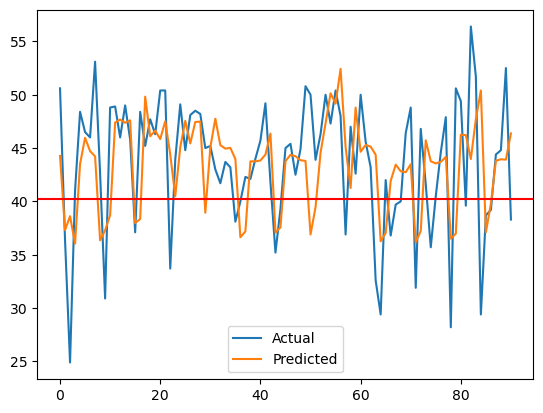

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

#### 5) 모델5 XGBoost

In [ ]:
model = XGBRegressor(max_depth=5, random_state=1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('XGB MAE:', mean_absolute_error(y_test, y_pred))
print('XGB MAPE:', mean_absolute_percentage_error(y_test, y_pred))

XGB MAE: 4.5978909251454105
XGB MAPE: 0.11136428353462335


평균 : 40.239461565710236


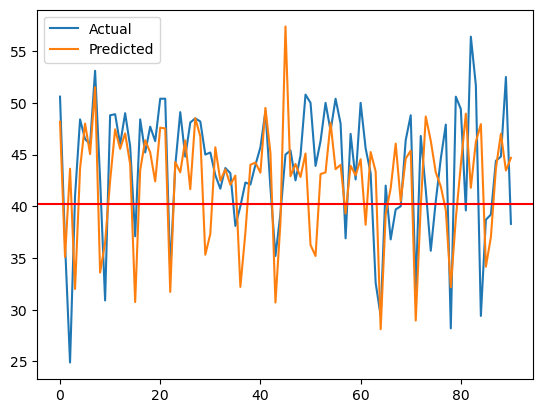

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

#### 6) 모델6 LightGBM

In [ ]:
model = LGBMRegressor(max_depth=5, verbose=-1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Light MAE:', mean_absolute_error(y_test, y_pred))
print('Light MAPE:', mean_absolute_percentage_error(y_test, y_pred))

Light MAE: 4.6480420932968185
Light MAPE: 0.11203163285264413


평균 : 40.239461565710236


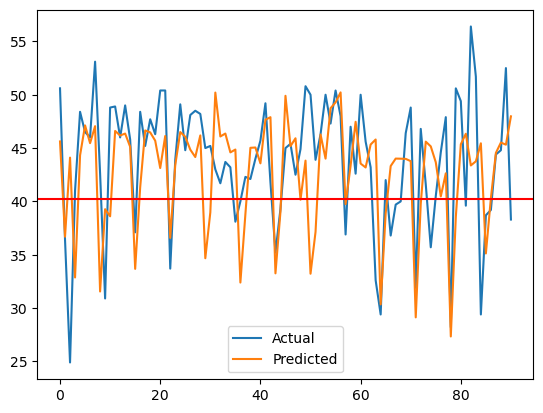

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

In [ ]:
model = Lasso()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Lasso MAE:', mean_absolute_error(y_test, y_pred))
print('Lasso MAPE:', mean_absolute_percentage_error(y_test, y_pred))

Lasso MAE: 4.3519800883877355
Lasso MAPE: 0.10878158969770102


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e+02, tolerance: 5.742e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
model = Ridge()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Ridge MAE:', mean_absolute_error(y_test, y_pred))
print('Ridge MAPE:', mean_absolute_percentage_error(y_test, y_pred))

Ridge MAE: 4.2206565475978755
Ridge MAPE: 0.10595232298243333


## 3.모델별 비교

In [ ]:
from pycaret.regression import *

In [ ]:
s = setup(data = x_train, target = y_train, session_id=123)

,Description,Value
0,Session id,123
1,Target,waiting_time
2,Target type,Regression
3,Original data shape,"(2823, 29)"
4,Transformed data shape,"(2823, 29)"
5,Transformed train set shape,"(1976, 29)"
6,Transformed test set shape,"(847, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5.2390,56.6437,7.4959,0.7053,0.1746,0.1351,8.1260
et,Extra Trees Regressor,5.2489,58.1503,7.5928,0.6984,0.1751,0.1358,0.8440
lightgbm,Light Gradient Boosting Machine,5.2998,58.3856,7.6112,0.6967,0.1757,0.1360,0.6150
gbr,Gradient Boosting Regressor,5.3486,58.6827,7.6335,0.6954,0.1765,0.1380,0.4620
rf,Random Forest Regressor,5.3813,59.9816,7.7145,0.6881,0.1787,0.1394,1.5840
lr,Linear Regression,5.4616,60.0540,7.7240,0.6873,0.1810,0.1434,0.7860
br,Bayesian Ridge,5.4668,60.2709,7.7376,0.6864,0.1809,0.1429,0.0730
ridge,Ridge Regression,5.4676,59.9793,7.7192,0.6876,0.1810,0.1435,0.0350
en,Elastic Net,5.6268,62.4757,7.8811,0.6756,0.1859,0.1479,0.0640
xgboost,Extreme Gradient Boosting,5.6284,64.0114,7.9727,0.6667,0.1851,0.1450,0.1240
